# Load Librabries and Data

In [1]:
#import required packages

import yfinance as yf
import datetime
import numpy as np
import pandas as pd

from pandas_datareader import data as wb
from scipy.stats import norm
from tabulate import tabulate
from colorama import Fore, Back, Style


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# set plotting parameters
%matplotlib inline
#sns.set_style("whitegrid")
plt.rc("figure", figsize=(12, 8))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

In [2]:
# Define the ticker symbol and date range
ticker = "BAS.DE"
start = '2017-01-01'
end = '2021-12-31'

# Download the historical stock prices
data_BASF = yf.download(ticker, start=start, end=end)


# Create a new DataFrame
df = pd.DataFrame(data_BASF)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,87.500000,88.809998,87.099998,88.699997,56.960785,1245318
2017-01-03,88.879997,88.879997,87.419998,87.699997,56.318604,2806564
2017-01-04,87.889999,88.150002,87.269997,88.150002,56.607590,1955701
2017-01-05,87.540001,88.250000,87.389999,87.790001,56.376411,1753933
2017-01-06,87.500000,87.730003,87.269997,87.519997,56.203014,1518979


## EDA

- plot the features and the target to see the relationship between them.

In [3]:
# Data Preparation


# Assuming df is the loaded DataFrame
X = df[['Open', 'High', 'Low', 'Volume']]  # Features
y = df['Close']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Machine Learning Models

## 1. Linear Reg

In [4]:
# Linear Regression


# Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Evaluate the linear Reg model
LR_metrics = pd.DataFrame({
    'Mean Squared Error': [mse_lr],
    'Mean Absolute Error': [mae_lr],
    'R-squared (R2)': [r2_lr]
}, index=['Linear Regression']).T

# Display the DataFrame
LR_metrics

,Linear Regression
Mean Squared Error,0.140814
Mean Absolute Error,0.288290
R-squared (R2),0.999249


In [5]:
df_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr}, index=X_test.index)
df_lr.head()

,Actual,Predicted
Date,,
2021-10-13,64.900002,64.572039
2021-02-10,67.150002,67.097003
2018-08-28,80.550003,80.780763
2021-06-07,68.510002,68.922824
2020-05-12,45.070000,45.402601


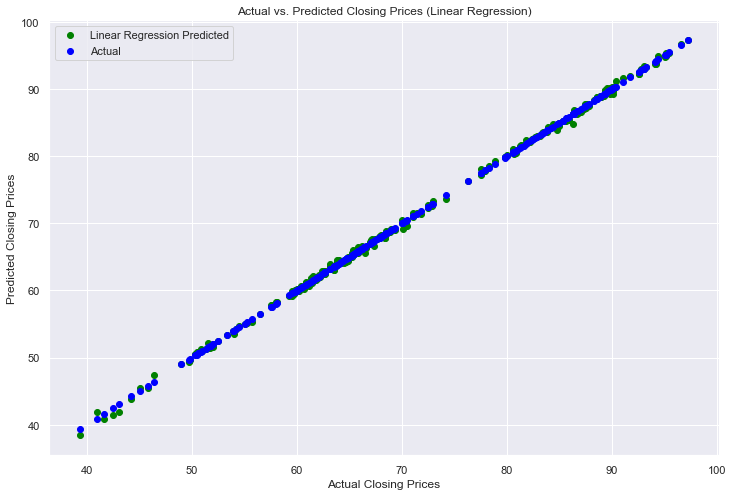

In [6]:
# Linear Regression Plot
plt.scatter(y_test, y_pred_lr, color='green', label='Linear Regression Predicted')
plt.scatter(y_test, y_test, color='blue', label='Actual')  
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.title('Actual vs. Predicted Closing Prices (Linear Regression)')
plt.legend()
plt.show()

### 2. Decision Tree: 

In [7]:
# Decision Tree



# Create and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Evaluate the Decision Tree model
dt_metrics = pd.DataFrame({
    'Mean Squared Error': [mse_dt],
    'Mean Absolute Error': [mae_dt],
    'R-squared (R2)': [r2_dt]
}, index=['Decision Tree Metrics']).T

# Display the DataFrame
dt_metrics

,Decision Tree Metrics
Mean Squared Error,0.414966
Mean Absolute Error,0.464311
R-squared (R2),0.997786


In [8]:
# DataFrames for Actual and Predicted Values
df_dt = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt}, index=X_test.index)
df_dt.head()

,Actual,Predicted
Date,,
2021-10-13,64.900002,64.599998
2021-02-10,67.150002,67.639999
2018-08-28,80.550003,80.930000
2021-06-07,68.510002,68.849998
2020-05-12,45.070000,45.580002


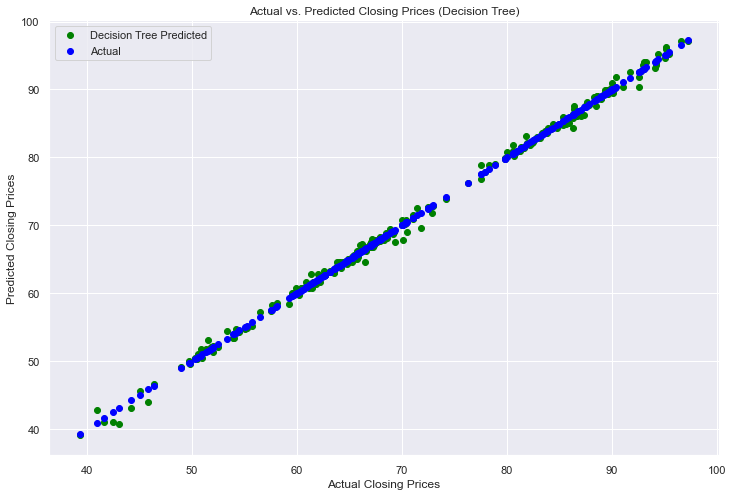

In [9]:
# Decision Tree Plot
plt.scatter(y_test, y_pred_dt, color='green', label='Decision Tree Predicted')
plt.scatter(y_test, y_test, color='blue', label='Actual')  
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.title('Actual vs. Predicted Closing Prices (Decision Tree)')
plt.legend()
plt.show()

### 3. KNN

In [10]:
# KNN


# Create and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Evaluate the Decision Tree model
dt_metrics = pd.DataFrame({
    'Mean Squared Error': [mse_knn],
    'Mean Absolute Error': [mae_knn],
    'R-squared (R2)': [r2_knn]
}, index=['KNN Metrics']).T

# Display the DataFrame
dt_metrics

,KNN Metrics
Mean Squared Error,191.160780
Mean Absolute Error,11.321020
R-squared (R2),-0.020025


In [11]:
df_knn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn}, index=X_test.index)
df_knn.head()

,Actual,Predicted
Date,,
2021-10-13,64.900002,68.006001
2021-02-10,67.150002,79.025999
2018-08-28,80.550003,79.551999
2021-06-07,68.510002,91.634000
2020-05-12,45.070000,70.496000


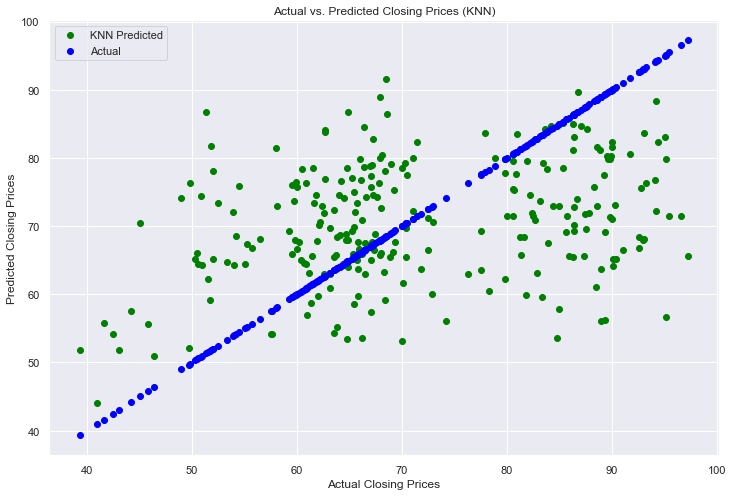

In [12]:
# KNN Plot
plt.scatter(y_test, y_pred_knn, color='green', label='KNN Predicted')
plt.scatter(y_test, y_test, color='blue', label='Actual')  
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.title('Actual vs. Predicted Closing Prices (KNN)')
plt.legend()
plt.show()

### 4. SVM:

In [13]:
# Support Vector Regression with RBF Kernel


svr_rbf_model = SVR(kernel='rbf')  # Using RBF kernel
svr_rbf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr_rbf = svr_rbf_model.predict(X_test)

# Evaluate the SVR with RBF Kernel model
mse_svr_rbf = mean_squared_error(y_test, y_pred_svr_rbf)
mae_svr_rbf = mean_absolute_error(y_test, y_pred_svr_rbf)
r2_svr_rbf = r2_score(y_test, y_pred_svr_rbf)

# Display the evaluation metrics for SVR with RBF Kernel
svr_rbf_metrics = pd.DataFrame({
    'Mean Squared Error': [mse_svr_rbf],
    'Mean Absolute Error': [mae_svr_rbf],
    'R-squared (R2)': [r2_svr_rbf]
}, index=['SVR with RBF Kernel']).T

svr_rbf_metrics

,SVR with RBF Kernel
Mean Squared Error,167.051920
Mean Absolute Error,10.611225
R-squared (R2),0.108619


In [14]:
df_svr_rbf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svr_rbf}, index=X_test.index)
df_svr_rbf.head()

,Actual,Predicted
Date,,
2021-10-13,64.900002,70.948055
2021-02-10,67.150002,71.676071
2018-08-28,80.550003,73.400791
2021-06-07,68.510002,73.802618
2020-05-12,45.070000,65.871994


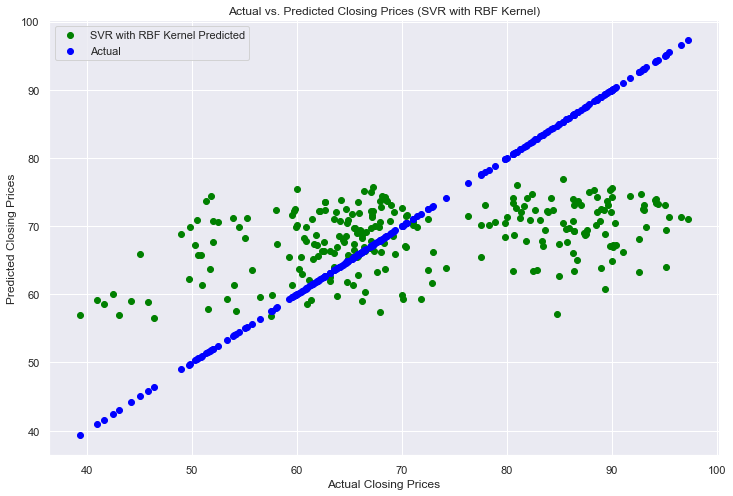

In [15]:
# Support Vector Regression with RBF Kernel Plot
plt.scatter(y_test, y_pred_svr_rbf, color='green', label='SVR with RBF Kernel Predicted')
plt.scatter(y_test, y_test, color='blue', label='Actual')  
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.title('Actual vs. Predicted Closing Prices (SVR with RBF Kernel)')
plt.legend()
plt.show()

## 5. Gradient Boosting

In [16]:
# Gradient Boosting


# Create and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Display the evaluation metrics for Gradient Boosting
gb_metrics = pd.DataFrame({
    'Mean Squared Error': [mse_gb],
    'Mean Absolute Error': [mae_gb],
    'R-squared (R2)': [r2_gb]
}, index=['Gradient Boosting']).T

gb_metrics

,Gradient Boosting
Mean Squared Error,0.275467
Mean Absolute Error,0.402602
R-squared (R2),0.998530


In [17]:
df_gb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gb}, index=X_test.index)
df_gb.head()

,Actual,Predicted
Date,,
2021-10-13,64.900002,64.524487
2021-02-10,67.150002,67.301996
2018-08-28,80.550003,80.892181
2021-06-07,68.510002,68.998039
2020-05-12,45.070000,45.473107


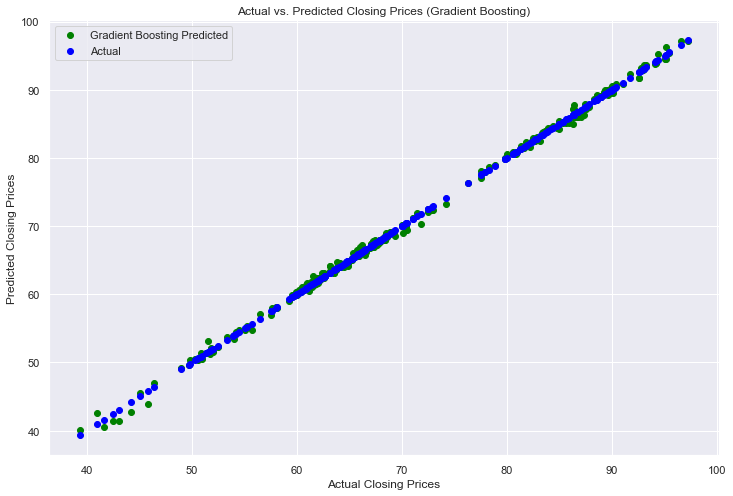

In [18]:
# Gradient Boosting Plot
plt.scatter(y_test, y_pred_gb, color='green', label='Gradient Boosting Predicted')
plt.scatter(y_test, y_test, color='blue', label='Actual')  
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.title('Actual vs. Predicted Closing Prices (Gradient Boosting)')
plt.legend()
plt.show()

### Compare The Models

In [19]:
# Create a DataFrame for model comparison
model_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'KNN', 'SVR', 'Linear Regression', 'Gradient Boosting'],
    'Mean Squared Error': [mse_dt, mse_knn, mse_svr_rbf, mse_lr, mse_gb],
    'Mean Absolute Error': [mae_dt, mae_knn, mae_svr_rbf, mae_lr, mae_gb],
    'R-squared (R2)': [r2_dt, r2_knn, r2_svr_rbf, r2_lr, r2_gb]
}).set_index('Model')

# Display the DataFrame
model_comparison

,Mean Squared Error,Mean Absolute Error,R-squared (R2)
Model,,,
Decision Tree,0.414966,0.464311,0.997786
KNN,191.160780,11.321020,-0.020025
SVR,167.051920,10.611225,0.108619
Linear Regression,0.140814,0.288290,0.999249
Gradient Boosting,0.275467,0.402602,0.998530


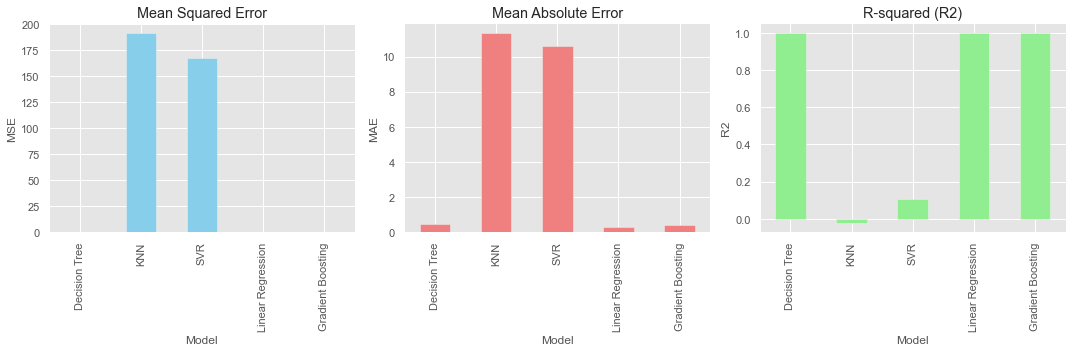

In [20]:
#import matplotlib.pyplot as plt

# Set the style for the plots
plt.style.use('ggplot')

# Create subplots for Mean Squared Error, Mean Absolute Error, and R-squared
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Bar plot for Mean Squared Error
model_comparison['Mean Squared Error'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Mean Squared Error')
axes[0].set_ylabel('MSE')

# Bar plot for Mean Absolute Error
model_comparison['Mean Absolute Error'].plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Mean Absolute Error')
axes[1].set_ylabel('MAE')

# Bar plot for R-squared
model_comparison['R-squared (R2)'].plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('R-squared (R2)')
axes[2].set_ylabel('R2')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# Black Scholes Model

In [21]:
# Assuming 'actual_stock_prices' is your actual stock prices
# Replace it with the actual stock prices corresponding to your test set
actual_stock_prices = y_test  # Assuming y_test contains the actual stock prices

# BSM Functions
def d1(S, X, r, stdev, T):
    return (np.log(S / X) + (r + stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))
 
def d2(S, X, r, stdev, T):
    return (np.log(S / X) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

def BSM_call(S, X, r, stdev, T):
    return (S * norm.cdf(d1(S, X, r, stdev, T))) - (X * np.exp(-r * T) * norm.cdf(d2(S, X, r, stdev, T)))

def BSM_put(S, X, r, stdev, T):
    return ((X * np.exp(-r * T) * norm.cdf(-d2(S, X, r, stdev, T))) - S * norm.cdf(-d1(S, X, r, stdev, T)))

# Use the last actual stock price as the current price
S_actual = actual_stock_prices[-1]

# Calculate the standard deviation for the actual stock returns
stdev_actual = np.std(actual_stock_prices) * 250 ** 0.5

# Set other Black-Scholes Model parameters
r = 0.025
X_option = 48
T_option = 1

# Calculate d1 and d2 for option pricing
d1_option_actual = d1(S_actual, X_option, r, stdev_actual, T_option)
d2_option_actual = d2(S_actual, X_option, r, stdev_actual, T_option)

# Estimate call and put option prices using BSM for actual values
call_option_price_actual = BSM_call(S_actual, X_option, r, stdev_actual, T_option)
put_option_price_actual = BSM_put(S_actual, X_option, r, stdev_actual, T_option)

# Now, let's repeat the process for the predicted values
# Use the last predicted stock price as the current price
S_pred = df_lr['Predicted'].iloc[-1]

# Calculate the standard deviation for the predicted stock returns
stdev_pred = np.std(df_lr['Predicted']) * 250 ** 0.5

# Calculate d1 and d2 for option pricing for predicted values
d1_option_pred = d1(S_pred, X_option, r, stdev_pred, T_option)
d2_option_pred = d2(S_pred, X_option, r, stdev_pred, T_option)

# Estimate call and put option prices using BSM for predicted values
call_option_price_pred = BSM_call(S_pred, X_option, r, stdev_pred, T_option)
put_option_price_pred = BSM_put(S_pred, X_option, r, stdev_pred, T_option)

# Create a dataframe with the results
results_df = pd.DataFrame({
    'Option Type': ['Call', 'Put'],
    'Actual Price': [call_option_price_actual, put_option_price_actual],
    'Predicted Price': [call_option_price_pred, put_option_price_pred]
})

# Display the results in tabular format
table = tabulate(results_df, headers='keys', tablefmt='pipe', showindex=False)

# Adding ANSI escape codes for blue pipes
table = table.replace('|', '\033[94m|\033[0m')

print(table)

| Option Type   |   Actual Price |   Predicted Price |
|:--------------|---------------:|------------------:|
| Call          |        94.21   |           93.7375 |
| Put           |        46.8149 |           46.8149 |


## VAR

In [22]:
# Assuming 'actual_stock_prices' and 'predicted_stock_prices' are available
# Modify the variable names if needed

# Function to calculate VaR for a given confidence level
def calculate_var(stock_prices, confidence_level=0.95):
    returns = np.diff(stock_prices) / stock_prices[:-1]  # Calculate daily returns
    log_returns = np.log(1 + returns)
    
    # Calculate mean and standard deviation of returns
    mean_return = np.mean(log_returns)
    std_dev_return = np.std(log_returns)
    
    # Calculate VaR using the inverse of the cumulative distribution function (CDF)
    z_score = norm.ppf(1 - confidence_level)
    var_value = stock_prices[-1] * np.exp(mean_return - std_dev_return * z_score)
    
    return var_value

# Calculate VaR for actual stock prices
var_actual = calculate_var(actual_stock_prices)

# Display VaR value for actual stock prices
#print(f"VaR for Actual Stock Prices: {var_actual}")

# Now, let's repeat the process for predicted stock prices
var_predicted = calculate_var(df_lr['Predicted'])

# Display VaR value for predicted stock prices
#print(f"VaR for Predicted Stock Prices: {var_predicted}")

# Create a dataframe for VaR results
var_results_df = pd.DataFrame({
    'Option Type': ['Actual', 'Predicted'],
    'VaR': [var_actual, var_predicted]
})

# Display the VaR results in tabular format
var_table = tabulate(var_results_df, headers='keys', tablefmt='pipe', showindex=False)

# Adding ANSI escape codes for blue pipes
var_table = var_table.replace('|', '\033[94m|\033[0m')

print("VaR Results:")
print(var_table)

VaR Results:
| Option Type   |     VaR |
|:--------------|--------:|
| Actual        | 146.191 |
| Predicted     | 145.553 |


# Probability of Default

In [23]:
# Assuming 'actual_stock_prices' and 'predicted_stock_prices' are available
# Modify the variable names if needed

# Function to calculate Probability of Default (PD) based on stock prices
def calculate_pd(stock_prices, threshold=0.8):
    returns = np.diff(stock_prices) / stock_prices[:-1]  # Calculate daily returns
    log_returns = np.log(1 + returns)
    
    # Assuming a simple threshold-based approach
    default_events = np.sum(log_returns < threshold)
    total_events = len(log_returns)
    
    # Calculate Probability of Default (PD)
    pd_value = default_events / total_events
    
    return pd_value

# Calculate PD for actual stock prices
pd_actual = calculate_pd(actual_stock_prices)

# Display PD value for actual stock prices
#print(f"Probability of Default (PD) for Actual Stock Prices: {pd_actual}")

# Now, let's repeat the process for predicted stock prices
pd_predicted = calculate_pd(df_lr['Predicted'])

# Display PD value for predicted stock prices
#print(f"Probability of Default (PD) for Predicted Stock Prices: {pd_predicted}")

# Create a dataframe for PD results
pd_results_df = pd.DataFrame({
    'Option Type': ['Actual', 'Predicted'],
    'PD': [pd_actual, pd_predicted]
})

# Display the PD results in tabular format
pd_table = tabulate(pd_results_df, headers='keys', tablefmt='pipe', showindex=False)

# Adding ANSI escape codes for blue pipes
pd_table = pd_table.replace('|', '\033[94m|\033[0m')

print("\nPD Results:")
print(pd_table)


PD Results:
| Option Type   |   PD |
|:--------------|-----:|
| Actual        |    1 |
| Predicted     |    1 |
